___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [20]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, average_precision_score
from sklearn.metrics import make_scorer, SCORERS, accuracy_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,6]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)


In [69]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [3]:
## Ingest Data from links below and make a dataframe
soldiers_male = "https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr"
soldiers_female = "https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq"

In [4]:
df_male = pd.read_csv(soldiers_male, encoding= 'ISO-8859-1', low_memory=False)
df_female = pd.read_csv(soldiers_female, encoding= 'ISO-8859-1', low_memory=False)


### EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)
- Gereksiz kolları bırakın
- 500'ün altındaki değer sayıyorsa Dodrace sınıfını bırakın (veri modelimizin 500'ün altında olup olmadığını öğrenemeyeceğini varsayıyoruz)

In [5]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [6]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [7]:
df_male.shape, df_female.shape

((4082, 108), (1986, 108))

In [8]:
df_male.columns != df_female.columns, (df_male.columns != df_female.columns).sum()

(array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False]),
 1)

In [9]:
df_female.rename({'SubjectId':'subjectid'},axis = 1, inplace = True)

In [10]:
(df_male.columns != df_female.columns).sum()

0

In [11]:
df = df_male.append(df_female, ignore_index=True)
df.sample(10)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
5323,25547,229,1311,310,226,1214,227,185,346,319,271,437,69,330,298,133,1035,238,829,603,504,351,1364,254,913,240,1155,785,623,327,33,58,20,207,725,91,257,317,264,470,439,1031,75,183,184,143,546,197,317,76,356,392,1023,655,383,391,447,498,463,60,398,112,341,364,1259,106,379,247,1018,333,122,826,784,542,1618,1600,1324,1068,619,161,738,434,114,845,1487,406,280,837,218,352,974,648,149,771,Female,10-Nov-11,Fort Gordon,Regular Army,Combat Service Support,25W,Delaware,2,NaN,2,43,63,144,Left hand
586,12736,291,1413,323,212,1313,230,190,428,331,264,510,69,308,300,139,1021,245,819,610,489,376,1500,308,1067,253,1275,831,607,383,37,63,24,267,787,91,258,337,290,591,453,1157,84,201,180,154,563,193,314,72,354,380,1042,610,442,463,483,549,482,67,402,129,385,419,1396,112,426,260,1196,351,148,915,874,574,1752,1736,1420,1106,607,180,804,465,141,844,1671,493,332,1006,267,413,1017,823,165,835,Male,3-Dec-10,Fort Bliss,Regular Army,Combat Service Support,31A,Ohio,1,NaN,1,30,69,180,Right hand
2325,21337,263,1548,368,246,1427,262,225,455,360,286,536,74,344,319,148,1055,247,985,655,536,413,1611,314,1129,270,1377,911,653,379,37,69,27,240,838,108,291,372,321,594,520,1260,93,223,207,157,588,205,364,72,362,401,1177,680,455,486,517,581,524,72,418,128,393,441,1521,128,458,293,1227,402,159,951,980,648,2008,1863,1535,1224,672,197,928,496,137,991,1808,474,357,1042,259,404,1150,994,187,900,Male,4-Aug-11,Fort Stewart,Regular Army,Combat Service Support,15T,West Virginia,1,NaN,1,28,74,215,Right hand
4753,18115,238,1299,289,227,1194,227,174,341,344,268,454,66,307,294,136,1005,245,788,578,464,394,1345,266,919,263,1145,743,594,355,27,60,19,239,707,92,235,304,285,528,411,994,77,187,170,152,549,186,304,68,339,388,944,605,380,380,439,495,451,66,422,110,341,357,1222,107,354,219,1001,313,127,815,750,485,1520,1563,1287,1029,631,167,702,429,124,809,1573,457,308,881,220,340,913,669,149,802,Female,6-Jul-11,Fort Lee,Regular Army,Combat Support,91E,Panama,3,Panamanian,3,56,62,146,Right hand
4739,18093,201,1370,315,220,1289,208,179,360,263,256,400,68,300,270,131,897,208,889,576,475,386,1433,258,783,192,1212,818,582,334,28,54,20,243,756,84,243,308,245,455,424,1040,74,182,174,140,533,178,305,67,312,3

In [12]:
(df_male.shape[0] + df_female.shape[0]), df.shape

(6068, (6068, 108))

In [13]:
df.columns = df.columns.str.lower()

In [14]:
df.head().T

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
axillaheight,1347,1293,1327,1239,1478
balloffootcircumference,253,245,256,262,267
balloffootlength,202,193,196,199,224
biacromialbreadth,401,394,427,401,435
bicepscircumferenceflexed,369,338,408,359,356


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 108 entries, subjectid to writingpreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,6068.0,20757.198418,13159.390894,10027.0,14841.75,20063.5,27234.50,920103.0
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.00,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.00,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.00,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.00,225.0,235.00,293.0
axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.00,1302.0,1349.00,1553.0
balloffootcircumference,6068.0,244.192650,16.845020,186.0,232.00,245.0,256.00,306.0
balloffootlength,6068.0,194.754614,13.516368,151.0,185.00,195.0,204.00,245.0
biacromialbreadth,6068.0,399.204186,30.236914,283.0,376.00,404.0,421.00,489.0
bicepscircumferenceflexed,6068.0,340.934245,41.519866,216.0,311.00,341.0,370.00,490.0


In [17]:
# std-mean-min-max karşılaştımasına baktığımızda subjectnumericrace gibi bazı featurelar göze çarpıyor, 

In [18]:
df.nunique().sort_values()

gender                               2
writingpreference                    3
branch                               3
component                            3
dodrace                              7
installation                        12
earprotrusion                       22
earbreadth                          22
heightin                            29
earlength                           36
bimalleolarbreadth                  37
handbreadth                         38
age                                 42
heelbreadth                         42
subjectnumericrace                  44
tragiontopofhead                    46
lateralmalleolusheight              47
headbreadth                         48
footbreadthhorizontal               49
palmlength                          50
bizygomaticbreadth                  50
headlength                          55
mentonsellionlength                 55
interpupillarybreadth               56
shoulderlength                      78
wristcircumference       

In [19]:
df.duplicated().sum()

0

In [20]:
df.isnull().sum().sort_values(ascending=False).head()

ethnicity               4647
subjectid                  0
radialestylionlength       0
thighcircumference         0
tenthribheight             0
dtype: int64

In [21]:
df.ethnicity.value_counts(dropna=False)

NaN                                                   4647
Mexican                                                357
Puerto Rican                                           183
Caribbean Islander                                     124
Filipino                                                67
Cherokee                                                65
Korean                                                  53
Dominican                                               32
Chinese                                                 26
Japanese                                                22
Vietnamese                                              21
Colombian                                               17
Cuban                                                   17
Arab or Middle Eastern                                  17
Salvadoran                                              16
East/Asian Indian                                       13
Samoan                                                  

In [22]:
df.dodrace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: dodrace, dtype: int64

In [23]:
# SubjectNumericRace – Subject Numeric Race; a single or multi-digit code
# indicating a subject’s self-reported race or races (verified through interview).
# Where 
# 1 = White, 2 = Black, 3 = Hispanic, 
# 4 = Asian, 5 = Native American,# 6 = Pacific Islander, 8 = Other del


In [24]:
df = df[["dodrace"]].join(df.drop(["dodrace"], axis=1))
#  Daha rahat okumak için target label başa alıyoruz
# We take Target Label to read more easily

In [25]:
df.corr().style.background_gradient(cmap='coolwarm')

In [26]:
(df.subjectnumericrace==df.dodrace).value_counts()

True     5262
False     806
dtype: int64

In [27]:
((df.subjectnumericrace==df.dodrace)>8).sum()

0

In [28]:
df[df["subjectnumericrace"]>8][["subjectnumericrace","dodrace"]]

,subjectnumericrace,dodrace
10,351,1
27,61,1
36,61,1
56,28,2
71,28,2
...,...,...
6033,231,2
6039,251,2
6040,31,3
6048,51,1


In [29]:
df.subjectnumericrace.unique()

array([    1,     2,   351,     3,    61,     4,    28,     5,    21,
          41,    31,   641,    23,     8,   251,    38,     6,    51,
          18,    64,   318,    63,    25,    43,   423,    35,   425,
         235,   358,    62,    42,   451,   238,  4251,   431,  2518,
         218,   231,   428,   651,   631,    48,  2351, 42351],
      dtype=int64)

In [30]:
df.subjectnumericrace.value_counts()

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: subjectnumericrace, dtype: int64

**Drop columns**

In [31]:
drop_columns = ["subjectnumericrace",
                "subjectid",
                "date",
                "installation",
                "component",
                "branch",
                "primarymos",
                "subjectsbirthlocation",
                "ethnicity",
                "age",
                "writingpreference"]

In [32]:
df.drop(drop_columns, inplace=True, axis=1)

In [33]:
df.shape

(6068, 97)

In [34]:
df.isnull().sum().sum()

0

### The Examination of Target Variable

In [35]:
df['dodrace'].describe()

count    6068.000000
mean        1.615030
std         0.979156
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: dodrace, dtype: float64

In [36]:
df['dodrace'].value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: dodrace, dtype: int64

In [37]:
# Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [38]:
df.drop(df[df['dodrace'] > 3].index, inplace = True)

In [39]:
df.shape

(5769, 97)

<AxesSubplot:ylabel='Frequency'>

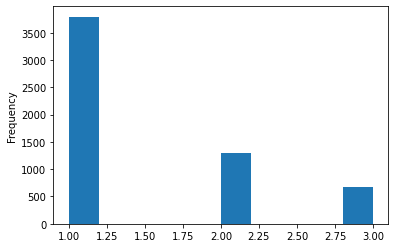

In [40]:
df['dodrace'].plot(kind='hist')

In [41]:
num_columns= df.drop(['dodrace'], axis=1).select_dtypes('number').columns

cat_columns = df.select_dtypes('object').columns

print(num_columns, end="\n\n"+"--"*25+"\n\n")
print(cat_columns)

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', 'handbreadth',
      

In [42]:
df["weightlbs"].describe()

count    5769.000000
mean      175.578263
std        33.600479
min         0.000000
25%       150.000000
50%       175.000000
75%       197.000000
max       321.000000
Name: weightlbs, dtype: float64

In [43]:
df["weightlbs"].value_counts().index.sort_values()

Int64Index([  0,  86,  88,  90,  95,  96,  98, 100, 101, 102,
            ...
            283, 285, 290, 292, 293, 295, 300, 310, 315, 321],
           dtype='int64', length=188)

In [44]:
df["weightkg"].describe()
# weightkg – Weight (in kg*10)

count    5769.000000
mean      800.981106
std       155.990338
min       358.000000
25%       686.000000
50%       790.000000
75%       900.000000
max      1442.000000
Name: weightkg, dtype: float64

In [45]:
df["weightkg"].value_counts().index.sort_values()

Int64Index([ 358,  393,  400,  428,  430,  431,  432,  435,  442,  444,
            ...
            1345, 1346, 1354, 1369, 1371, 1375, 1400, 1413, 1429, 1442],
           dtype='int64', length=774)

In [46]:
df.drop("weightlbs", inplace=True, axis=1)
# "weightlbs" sütununda hatalı veriler var. bu nedenle düşüldü.
# "Weightlbs" column has wrong data.Therefore, it was dropped.

In [47]:
df["gender"].value_counts()

Male      3899
Female    1870
Name: gender, dtype: int64

In [48]:
print(df.groupby('gender')['dodrace'].mean().sort_values())

gender
Male      1.390357
Female    1.606417
Name: dodrace, dtype: float64


### Multicorrelation

In [49]:
def color_red(val):
    
    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

In [50]:
df.corr().style.applymap(color_red)

,dodrace,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight


In [51]:
def multi_corr(dataset, corr_num):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= corr_num) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

In [52]:
df_not_multi = df.copy()

In [53]:
multi_corr(df_not_multi, 0.9)

In [54]:
df.shape

(5769, 96)

In [55]:
df_not_multi.shape
# Şimdilik df ile devam edeceğim
# I will continue with DF for now

(5769, 60)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [56]:
df.shape

(5769, 96)

In [57]:
X = df.drop("dodrace", axis=1)
y = df["dodrace"]

In [95]:
y = y.map({
    1: "White",
    2: "Black",
    3: "Hispanic"
})
# Yorumlaması kolay olması için kategorik adlarını verdim

In [10]:
# X.to_csv('X.csv', index = False, encoding='utf-8')
# y.to_csv('y.csv', index = False, encoding='utf-8')

In [82]:
# df.to_csv('ready2_model.csv', index = False, encoding='utf-8') 

### Train / Test and Split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [60]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4326, 95)
Train target shape   :  (4326,)
Test features shape  :  (1443, 95)
Test target shape    :  (1443,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [61]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## 1. Logistic model

### Vanilla Logistic Model

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
cat_columns = X_train.select_dtypes("object").columns

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_columns),
                                            remainder=MinMaxScaler())

logistic_model = LogisticRegression(class_weight="balanced", max_iter=10000, random_state=42)

operations = [("EncoderScale", column_trans), ("LogisticModel", logistic_model)]
pipe_log_model = Pipeline(steps=operations)


In [63]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)
# Beklendiği gibi azınlık Hispanic sınıf değerleri çok kötü
# As expected, the minority of hispanic class values are very bad

Test_Set
[[315  23  13]
 [ 10 119  46]
 [ 19 157 741]]
              precision    recall  f1-score   support

       Black       0.92      0.90      0.91       351
    Hispanic       0.40      0.68      0.50       175
       White       0.93      0.81      0.86       917

    accuracy                           0.81      1443
   macro avg       0.75      0.80      0.76      1443
weighted avg       0.86      0.81      0.83      1443


Train_Set
[[ 855   69   23]
 [  44  369   91]
 [  61  487 2327]]
              precision    recall  f1-score   support

       Black       0.89      0.90      0.90       947
    Hispanic       0.40      0.73      0.52       504
       White       0.95      0.81      0.88      2875

    accuracy                           0.82      4326
   macro avg       0.75      0.81      0.76      4326
weighted avg       0.87      0.82      0.84      4326



### Cross Validate

In [64]:
scoring = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"])}

In [65]:
operations = [("EncoderScale", column_trans), ("LogisticModel", logistic_model)]
pipe_log_model = Pipeline(steps=operations)

scores = cross_validate(pipe_log_model, X_train, y_train, scoring=scoring, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_precision_Hispanic     0.376919
train_precision_Hispanic    0.400277
test_recall_Hispanic        0.686431
train_recall_Hispanic       0.729061
test_f1_Hispanic            0.485897
train_f1_Hispanic           0.516806
dtype: float64

### Logistic Model GridsearchCV

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [68]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [69]:
param_grid = {
    "LogisticModel__C": [0.5, 1, 2, 5],
    'LogisticModel__penalty': ["l1", "l2"],
    'LogisticModel__solver': ['liblinear', 'lbfgs', "sag", "saga"],
}

In [70]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_columns),
                                            remainder=MinMaxScaler())

logistic_model = LogisticRegression(class_weight="balanced", max_iter=10000, random_state=42)

operations = [("EncoderScale", column_trans), ("LogisticModel", logistic_model)]
pipe_log_model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(pipe_log_model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic, # Score we want healing
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [71]:
log_model_grid.fit(X_train,y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('EncoderScale',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['gender'], dtype='object'))])),
                                       ('LogisticModel',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'LogisticModel__C': [0.5, 1, 2, 5],
                         'LogisticModel__penalty': ['l1', 'l2'],
                         'LogisticModel__solver': ['liblinear', 'lbfgs', 'sag',
                                                   'saga']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [72]:
log_model_grid.best_estimator_

Pipeline(steps=[('EncoderScale',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['gender'], dtype='object'))])),
                ('LogisticModel',
                 LogisticRegression(C=2, class_weight='balanced',
                                    max_iter=10000, random_state=42))])

In [73]:
log_model_grid.best_params_

{'LogisticModel__C': 2,
 'LogisticModel__penalty': 'l2',
 'LogisticModel__solver': 'lbfgs'}

In [74]:
pd.DataFrame(log_model_grid.cv_results_).loc[log_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.688392
mean_train_score    0.736774
Name: 21, dtype: object

In [75]:
log_model_grid.best_score_

0.688392156862745

In [76]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[314  27  10]
 [ 10 120  45]
 [ 17 158 742]]
              precision    recall  f1-score   support

       Black       0.92      0.89      0.91       351
    Hispanic       0.39      0.69      0.50       175
       White       0.93      0.81      0.87       917

    accuracy                           0.81      1443
   macro avg       0.75      0.80      0.76      1443
weighted avg       0.86      0.81      0.83      1443


Train_Set
[[ 859   65   23]
 [  42  373   89]
 [  58  483 2334]]
              precision    recall  f1-score   support

       Black       0.90      0.91      0.90       947
    Hispanic       0.40      0.74      0.52       504
       White       0.95      0.81      0.88      2875

    accuracy                           0.82      4326
   macro avg       0.75      0.82      0.77      4326
weighted avg       0.88      0.82      0.84      4326



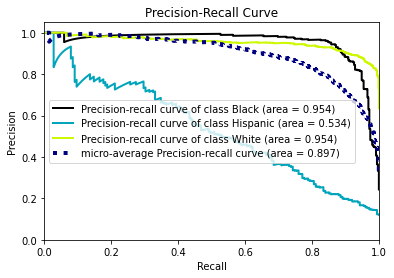

In [77]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


operations = [("EncoderScale", column_trans), ("LogisticModel", logistic_model)]
pipe_log_model = Pipeline(steps=operations)

pipe_log_model.fit(X_train, y_train)

y_pred_proba = pipe_log_model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [78]:
y_test_dummies = pd.get_dummies(y_test).values

log_prec = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
log_prec

0.533762089505784

In [79]:
y_pred = log_model_grid.predict(X_test)

log_prec = precision_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])
# Karşılaştırmak için skorları kaydediyorum.
# I record the scores to compare.

In [138]:
compare_dict = {
    "logistic_score": 
    {"precision":log_prec,
    "f1":log_f1,
    "recall":log_recall}
}

## 2. SVC

### Vanilla SVC model 

In [2]:
df = pd.read_csv("ready2_model.csv")

In [4]:
X = pd.read_csv("ready2_X.csv")
y = pd.read_csv("ready2_y.csv")

In [85]:
X = df.drop("dodrace", axis=1)
y = df["dodrace"]

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [107]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_columns),
                                            remainder=MinMaxScaler())
svc_model = SVC(class_weight="balanced", random_state=42)

operations = [("EncoderScale", column_trans), ("SVCModel", svc_model)]
pipe_svc_model = Pipeline(steps=operations)

In [108]:
pipe_svc_model.fit(X_train, y_train)

Pipeline(steps=[('EncoderScale',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['gender'], dtype='object'))])),
                ('SVCModel', SVC(class_weight='balanced', random_state=42))])

In [109]:
eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[317  21  13]
 [ 16 108  51]
 [ 13 155 749]]
              precision    recall  f1-score   support

       Black       0.92      0.90      0.91       351
    Hispanic       0.38      0.62      0.47       175
       White       0.92      0.82      0.87       917

    accuracy                           0.81      1443
   macro avg       0.74      0.78      0.75      1443
weighted avg       0.85      0.81      0.83      1443


Train_Set
[[ 892   37   18]
 [  32  402   70]
 [  65  421 2389]]
              precision    recall  f1-score   support

       Black       0.90      0.94      0.92       947
    Hispanic       0.47      0.80      0.59       504
       White       0.96      0.83      0.89      2875

    accuracy                           0.85      4326
   macro avg       0.78      0.86      0.80      4326
weighted avg       0.89      0.85      0.86      4326



In [112]:
operations = [("EncoderScale", column_trans), ("SVCModel", svc_model)]
pipe_svc_model = Pipeline(steps=operations)

scores = cross_validate(pipe_svc_model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_precision_Hispanic     0.383726
train_precision_Hispanic    0.477620
test_recall_Hispanic        0.648706
train_recall_Hispanic       0.807096
test_f1_Hispanic            0.480427
train_f1_Hispanic           0.600091
dtype: float64

###  SVC Model GridsearchCV

In [113]:
param_grid = {
    'svc__C': [0.5, 1],
    'svc__gamma': ["scale", "auto", 0.01]
}

recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [114]:
operations = [("EncoderScale", column_trans), ("SVCModel", svc_model)]
pipe_svc_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_svc_model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [115]:
svm_model_grid.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['gender'], dtype='object'))])),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
                         'svc__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [116]:
svm_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['gender'], dtype='object'))])),
                ('svc', SVC(C=0.5, class_weight='balanced', random_state=101))])

In [117]:
svm_model_grid.best_params_

{'svc__C': 0.5, 'svc__gamma': 'scale'}

In [118]:
svm_model_grid.best_index_

0

In [119]:
pd.DataFrame(svm_model_grid.cv_results_).loc[3, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.648706
mean_train_score    0.807096
Name: 3, dtype: object

In [120]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[311  27  13]
 [ 14 111  50]
 [ 15 169 733]]
              precision    recall  f1-score   support

       Black       0.91      0.89      0.90       351
    Hispanic       0.36      0.63      0.46       175
       White       0.92      0.80      0.86       917

    accuracy                           0.80      1443
   macro avg       0.73      0.77      0.74      1443
weighted avg       0.85      0.80      0.82      1443


Train_Set
[[ 878   44   25]
 [  36  389   79]
 [  67  477 2331]]
              precision    recall  f1-score   support

       Black       0.90      0.93      0.91       947
    Hispanic       0.43      0.77      0.55       504
       White       0.96      0.81      0.88      2875

    accuracy                           0.83      4326
   macro avg       0.76      0.84      0.78      4326
weighted avg       0.88      0.83      0.85      4326



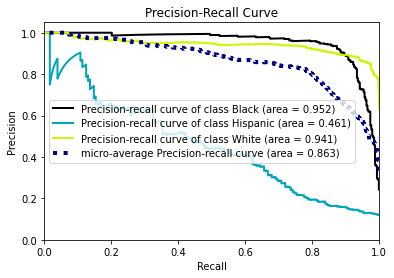

In [127]:
svc_model = SVC(class_weight="balanced",C=0.5, random_state=42,probability=True)
operations = [("EncoderScale", column_trans), ("SVCModel", svc_model)]


pipe_svc_model = Pipeline(steps=operations)

pipe_svc_model.fit(X_train, y_train)

decision_function = pipe_svc_model.decision_function(X_test)

#y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, decision_function)
plt.show();

In [128]:
y_pred = svm_model_grid.predict(X_test)

svc_prec = precision_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])


In [143]:
compare_dict["svc_score"] = {"precision":svc_prec,"f1":svc_f1,"recall":svc_recall}

In [144]:
compare_dict

{'logistic_score': {'precision': array([0.39344262]),
  'f1': array([0.5]),
  'recall': array([0.68571429])},
 'svc_score': {'precision': array([0.36156352]),
  'f1': array([0.46058091]),
  'recall': array([0.63428571])}}

## 3. RF

### Vanilla RF Model

In [147]:
cat_columns

Index(['gender'], dtype='object')

In [156]:
column_trans = make_column_transformer((OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), 
                                cat_columns), remainder="passthrough")
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)

operations = [("OrdinalEncoder", column_trans), ("RFModel", rf_model)]
pipe_rf_model = Pipeline(steps=operations)

In [157]:
pipe_rf_model.fit(X_train, y_train)
eval_metric(pipe_rf_model, X_train, y_train, X_test, y_test)
# Overfit

Test_Set
[[235   0 116]
 [ 12   7 156]
 [ 10   3 904]]
              precision    recall  f1-score   support

       Black       0.91      0.67      0.77       351
    Hispanic       0.70      0.04      0.08       175
       White       0.77      0.99      0.86       917

    accuracy                           0.79      1443
   macro avg       0.79      0.57      0.57      1443
weighted avg       0.80      0.79      0.75      1443


Train_Set
[[ 947    0    0]
 [   0  504    0]
 [   0    0 2875]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       947
    Hispanic       1.00      1.00      1.00       504
       White       1.00      1.00      1.00      2875

    accuracy                           1.00      4326
   macro avg       1.00      1.00      1.00      4326
weighted avg       1.00      1.00      1.00      4326



In [158]:
operations = [("OrdinalEncoder", column_trans), ("RFModel", rf_model)]
pipe_rf_model = Pipeline(steps=operations)

scores = cross_validate(pipe_rf_model, X_train, y_train, scoring = scoring, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_precision_Hispanic     0.673333
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.021822
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.041949
train_f1_Hispanic           1.000000
dtype: float64

### RF Model GridsearchCV

In [162]:
param_grid = {'RFModel__n_estimators':[400,500],
            'RFModel__max_depth':[2,3], 
            'RFModel__min_samples_split':[18,20,22],
            'RFModel__max_features': ['auto', None, 15, 20]}

In [163]:
operations = [("OrdinalEncoder", column_trans), ("RFModel", rf_model)]
pipe_rf_model = Pipeline(steps=operations)

rf_grid_model = GridSearchCV(estimator= pipe_rf_model,
                            param_grid=param_grid,
                            scoring=recall_Hispanic,
                            n_jobs=-1,
                            verbose=3,
                            return_train_score=True)

In [164]:
rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=Pipeline(steps=[('EncoderScale',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['gender'], dtype='object'))])),
                                       ('RFModel',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'RFModel__max_depth': [2, 3],
                         'RFModel__max_features': ['auto', None, 15, 20],
                         'RFModel__min_samples_split': [18, 20, 22],
                         'RFModel__n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [165]:
rf_grid_model.best_params_

{'RFModel__max_depth': 2,
 'RFModel__max_features': 'auto',
 'RFModel__min_samples_split': 18,
 'RFModel__n_estimators': 400}

In [167]:
pd.DataFrame(rf_grid_model.cv_results_).loc[rf_grid_model.best_index_,
                                             ["mean_test_score", "mean_train_score"]]

mean_test_score     0.646772
mean_train_score    0.670121
Name: 0, dtype: object

In [168]:
rf_grid_model.best_score_

0.6467722772277228

In [169]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[238  80  33]
 [ 20 116  39]
 [104 329 484]]
              precision    recall  f1-score   support

       Black       0.66      0.68      0.67       351
    Hispanic       0.22      0.66      0.33       175
       White       0.87      0.53      0.66       917

    accuracy                           0.58      1443
   macro avg       0.58      0.62      0.55      1443
weighted avg       0.74      0.58      0.62      1443


Train_Set
[[ 667  207   73]
 [  37  340  127]
 [ 248 1157 1470]]
              precision    recall  f1-score   support

       Black       0.70      0.70      0.70       947
    Hispanic       0.20      0.67      0.31       504
       White       0.88      0.51      0.65      2875

    accuracy                           0.57      4326
   macro avg       0.59      0.63      0.55      4326
weighted avg       0.76      0.57      0.62      4326



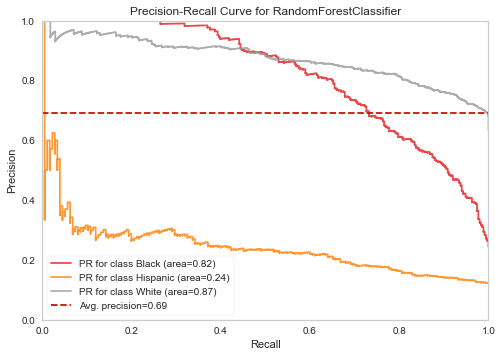

In [173]:
from yellowbrick.classifier import PrecisionRecallCurve

rf_model = RandomForestClassifier(class_weight="balanced", max_depth=2, max_features="auto",
                                        min_samples_split=18, n_estimators=400, random_state=42)
operations = [("EncoderScale", column_trans), ("RFModel", rf_model)]

pipe_rf_model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    pipe_rf_model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [174]:
y_pred = rf_grid_model.predict(X_test)

rf_prec = precision_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])


In [175]:
compare_dict["rf_score"] = {"precision":rf_prec,"f1":rf_f1,"recall":rf_recall}

## 4. XGBoost

### Vanilla XGBoost Model

In [198]:
y = y.map({
    "White": 0,
    "Black": 1,
    "Hispanic":2
})

In [199]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [200]:
column_trans = make_column_transformer((OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), 
                                cat_columns), remainder="passthrough")
xgb_model = XGBClassifier(random_state=42)

operations = [("OrdinalEncoder", column_trans), ("XGBModel", xgb_model)]
pipe_xgb_model = Pipeline(steps=operations)

In [201]:
pipe_xgb_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender'], dtype='object'))])),
                ('XGBModel',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto', ...))])

In [202]:
eval_metric(pipe_xgb_model, X_train, y_train, X_test, y_test)
# Overfit

Test_Set
[[897  13   7]
 [ 50 296   5]
 [125  19  31]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       917
           1       0.90      0.84      0.87       351
           2       0.72      0.18      0.28       175

    accuracy                           0.85      1443
   macro avg       0.82      0.67      0.69      1443
weighted avg       0.84      0.85      0.82      1443


Train_Set
[[2875    0    0]
 [   0  947    0]
 [   0    0  504]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2875
           1       1.00      1.00      1.00       947
           2       1.00      1.00      1.00       504

    accuracy                           1.00      4326
   macro avg       1.00      1.00      1.00      4326
weighted avg       1.00      1.00      1.00      4326



In [203]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights
# class_weight='balanced' olarak tekrar kontrol ediyorum
# I control it again as class_weight = 'balanced'

array([1.52270327, 0.50156522, 1.52270327, ..., 0.50156522, 0.50156522,
       0.50156522])

In [214]:
pipe_xgb_model.fit(X_train,y_train, XGBModel__sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. 
# Therefore, we need to assign the weight of each class to its instances, which is the same thing.
# XGBoost'taki ağırlık parametresi, sınıf başına değil örnek başınadır.
# Bu nedenle, her sınıfın ağırlığını örneklerine atamamız gerekir ki bu da aynı şeydir.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender'], dtype='object'))])),
                ('XGBModel',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto', ...))])

In [216]:
eval_metric(pipe_xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[870  24  23]
 [ 32 309  10]
 [106  17  52]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       917
           1       0.88      0.88      0.88       351
           2       0.61      0.30      0.40       175

    accuracy                           0.85      1443
   macro avg       0.79      0.71      0.73      1443
weighted avg       0.84      0.85      0.84      1443


Train_Set
[[2875    0    0]
 [   0  947    0]
 [   0    0  504]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2875
           1       1.00      1.00      1.00       947
           2       1.00      1.00      1.00       504

    accuracy                           1.00      4326
   macro avg       1.00      1.00      1.00      4326
weighted avg       1.00      1.00      1.00      4326



In [235]:
operations = [("OrdinalEncoder", column_trans), ("XGBModel", xgb_model)]
pipe_xgb_model = Pipeline(steps=operations)

scores = cross_validate(pipe_xgb_model, X_train, y_train, scoring= ["accuracy", "f1_macro", "precision_macro", "recall_macro" ],
 cv = 5, return_train_score=True,
                        fit_params={"XGBModel__sample_weight":classes_weights})
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy            0.843043
train_accuracy           1.000000
test_f1_macro            0.698854
train_f1_macro           1.000000
test_precision_macro     0.744132
train_precision_macro    1.000000
test_recall_macro        0.682888
train_recall_macro       1.000000
dtype: float64

### XGBoost Model GridsearchCV

In [237]:
param_grid = {"XGBModel__n_estimators":[20, 40],
              'XGBModel__max_depth':[1,2],
              "XGBModel__learning_rate": [0.03, 0.05],
              "XGBModel__subsample":[0.8, 1],
              "XGBModel__colsample_bytree":[0.8, 1]}

In [268]:
f1_Hispanic = make_scorer(f1_score, average = None, labels =["Hispanic"], needs_proba=True)

In [270]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGBModel", xgb_model)]

pipe_xgb_model = Pipeline(steps=operations)

xgb_grid_model = GridSearchCV(pipe_xgb_model, 
                              param_grid, 
                              scoring= f1_Hispanic,
                              cv=5,
                              n_jobs = -1,
                              return_train_score=True)

In [271]:
xgb_grid_model.fit(X_train, y_train, XGBModel__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['gender'], dtype='object'))])),
                                       ('XGBModel',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      callbacks=None,
                                                      colsample_bylevel=1,
                                                      colsample_bynode...
                                                      num_parallel_tree=1,
                                                      objective='multi:softprob',
                                                      predictor='auto', ...))]),
             n_jobs=-1,
             param_grid={'XGBModel__colsample_bytree': [0.8, 1],
                         'XGBModel__learning_rate': [0.03, 0.05],
                         'XGBModel__max_depth': [1, 2],
                         'XGBModel__n_estimators': [20, 40],
                         'XGBModel__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(f1_score, needs_proba=True, average=None, labels=['Hispanic']))

In [244]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender'], dtype='object'))])),
                ('XGBModel',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.8, earl...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.03,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=1, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=20, n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto', ...))])

In [272]:
xgb_grid_model.best_params_

{'XGBModel__colsample_bytree': 0.8,
 'XGBModel__learning_rate': 0.03,
 'XGBModel__max_depth': 1,
 'XGBModel__n_estimators': 20,
 'XGBModel__subsample': 0.8}

In [273]:
xgb_grid_model.best_index_

0

In [275]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]
# !!!

mean_test_score     NaN
mean_train_score    NaN
Name: 0, dtype: object

In [277]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[550 114 253]
 [ 75 206  70]
 [ 61  37  77]]
              precision    recall  f1-score   support

           0       0.80      0.60      0.69       917
           1       0.58      0.59      0.58       351
           2       0.19      0.44      0.27       175

    accuracy                           0.58      1443
   macro avg       0.52      0.54      0.51      1443
weighted avg       0.67      0.58      0.61      1443


Train_Set
[[1662  342  871]
 [ 201  553  193]
 [ 152   81  271]]
              precision    recall  f1-score   support

           0       0.82      0.58      0.68      2875
           1       0.57      0.58      0.58       947
           2       0.20      0.54      0.29       504

    accuracy                           0.57      4326
   macro avg       0.53      0.57      0.52      4326
weighted avg       0.70      0.57      0.61      4326



In [282]:
column_trans = make_column_transformer((OrdinalEncoder(handle_unknown="use_encoded_value", 
                                                        unknown_value=-1), 
                                                        cat_columns), 
                                                        remainder="passthrough")
xgb_model = XGBClassifier(colsample_bytree=0.8,
                        learning_rate=0.03, 
                        max_depth=1, 
                        n_estimators=20, 
                        objective='merror', 
                        subsample=0.8,
                        random_state=42)
operations = [("OrdinalEncoder", column_trans), ("XGBModel", xgb_model)]

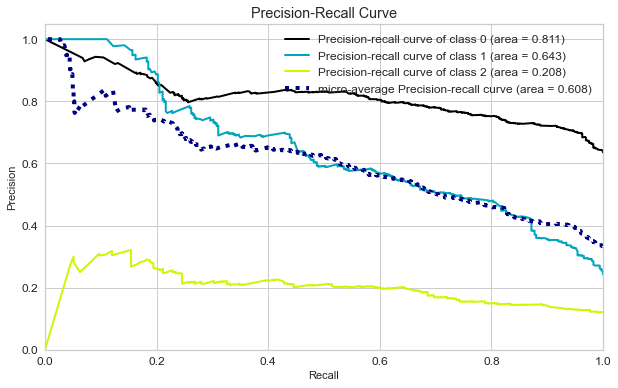

In [283]:
pipe_xgb_model = Pipeline(steps=operations)

pipe_xgb_model.fit(X_train, y_train, XGBModel__sample_weight=classes_weights)

y_pred_proba = pipe_xgb_model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show()

In [286]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 2], y_pred_proba[:, 2])

0.20840719687743178

In [287]:
y_pred_proba

array([[0.2980775 , 0.30957332, 0.39234912],
       [0.3280537 , 0.28617173, 0.3857745 ],
       [0.31901935, 0.37345275, 0.30752787],
       ...,
       [0.32621193, 0.2901794 , 0.38360867],
       [0.3087152 , 0.39680138, 0.29448348],
       [0.4016763 , 0.30899   , 0.28933373]], dtype=float32)

In [297]:
y_pred = xgb_grid_model.predict(X_test)

xgb_prec = average_precision_score(y_test_dummies[:, 2], y_pred_proba[:, 2])
xgb_f1 = f1_score(y_test, y_pred, average=None, labels=[2])
xgb_recall = recall_score(y_test, y_pred, average=None, labels=[2])

In [303]:
compare_dict["xgb_score"] = {"precision":xgb_prec,"f1":xgb_f1,"recall":xgb_recall}

In [305]:
compare_dict

{'logistic_score': {'precision': array([0.39344262]),
  'f1': array([0.5]),
  'recall': array([0.68571429])},
 'svc_score': {'precision': array([0.36156352]),
  'f1': array([0.46058091]),
  'recall': array([0.63428571])},
 'rf_score': {'precision': array([0.1925]),
  'f1': array([0.26782609]),
  'recall': array([0.44])},
 'xgb_score': {'precision': 0.20840719687743178,
  'f1': array([0.26782609]),
  'recall': array([0.44])}}

## Comparing Models

In [345]:
compare_df = pd.DataFrame(compare_dict)
compare_df = compare_df.astype(float).T


In [344]:
compare_df.sort_values(by="precision", ascending=False)

,precision,f1,recall
logistic_score,0.393443,0.500000,0.685714
svc_score,0.361564,0.460581,0.634286
xgb_score,0.208407,0.267826,0.440000
rf_score,0.192500,0.267826,0.440000


# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [15]:
df = pd.read_csv("ready2_model.csv")

In [16]:
X = df.drop("dodrace", axis=1)
y = df["dodrace"]

In [21]:
cat_columns = X.select_dtypes("object").columns
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",
                                                    sparse=False), cat_columns),
                                                    remainder=MinMaxScaler())

logistic_model = LogisticRegression(class_weight="balanced",
                                    max_iter=10000, 
                                    C=2,
                                    penalty="l2",
                                    solver="lbfgs",
                                    random_state=42)

operations = [("EncoderScale", column_trans), ("LogisticModel", logistic_model)]

final_model = Pipeline(steps=operations)

In [23]:
y = y.map({
    1: "White",
    2: "Black",
    3: "Hispanic"
})

In [25]:
final_model.fit(X, y)

Pipeline(steps=[('EncoderScale',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['gender'], dtype='object'))])),
                ('LogisticModel',
                 LogisticRegression(C=2, class_weight='balanced',
                                    max_iter=10000, random_state=42))])

In [26]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.6968020172982514

In [27]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.6851929207431021

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
# pip install imblearn

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [57]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [32]:
X_train_ohe = column_trans.fit_transform(X_train)

In [60]:
over = SMOTE(sampling_strategy={"Hispanic": 900})
under = RandomUnderSampler(sampling_strategy={"White": 2250})

In [61]:
# we are configuring our pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)

In [63]:
y_resampled.value_counts()

White       2250
Black        947
Hispanic     900
Name: dodrace, dtype: int64

In [64]:
y_train.value_counts()

White       2875
Black        947
Hispanic     504
Name: dodrace, dtype: int64

## Logistic Regression Over/Under Sampling

In [65]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",
                                                    sparse=False), cat_columns),
                                                    remainder=MinMaxScaler())

logistic_model = LogisticRegression(max_iter=10000, 
                                    C=2,
                                    penalty="l2",
                                    solver="lbfgs",
                                    random_state=42)

In [72]:
operations = [("EncoderScale", column_trans), ("LogisticModel", logistic_model)]

smote_pipeline = imbpipeline(steps=operations)

In [73]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('EncoderScale',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['gender'], dtype='object'))])),
                ('LogisticModel',
                 LogisticRegression(max_iter=10000, random_state=42))])

In [70]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[308   8  35]
 [ 16  50 109]
 [  9  20 888]]
              precision    recall  f1-score   support

       Black       0.92      0.88      0.90       351
    Hispanic       0.64      0.29      0.40       175
       White       0.86      0.97      0.91       917

    accuracy                           0.86      1443
   macro avg       0.81      0.71      0.74      1443
weighted avg       0.85      0.86      0.85      1443


Train_Set
[[ 856   21   70]
 [  51  176  277]
 [  34   57 2784]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91       947
    Hispanic       0.69      0.35      0.46       504
       White       0.89      0.97      0.93      2875

    accuracy                           0.88      4326
   macro avg       0.83      0.74      0.77      4326
weighted avg       0.87      0.88      0.87      4326



In [ ]:
# recall değeri çok düştü. Smote uygulamayacağım
# Recall value has fallen too much.I will not apply smote

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# pip install shap

In [76]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_columns), 
                                       remainder=MinMaxScaler())

X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=42, penalty="l1", solver='saga')
# feature importance için saga-l1 ile modeli deniyorum
# I try the model with saga-l1 for feature importnament
model_shap.fit(X_train_trans, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=42, solver='saga')

In [77]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

Test_Set
[[311  28  12]
 [ 11 124  40]
 [ 16 156 745]]
              precision    recall  f1-score   support

       Black       0.92      0.89      0.90       351
    Hispanic       0.40      0.71      0.51       175
       White       0.93      0.81      0.87       917

    accuracy                           0.82      1443
   macro avg       0.75      0.80      0.76      1443
weighted avg       0.87      0.82      0.83      1443


Train_Set
[[ 854   68   25]
 [  43  369   92]
 [  53  489 2333]]
              precision    recall  f1-score   support

       Black       0.90      0.90      0.90       947
    Hispanic       0.40      0.73      0.52       504
       White       0.95      0.81      0.88      2875

    accuracy                           0.82      4326
   macro avg       0.75      0.82      0.76      4326
weighted avg       0.88      0.82      0.84      4326



In [82]:
scoring = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"])}

In [83]:
model = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')

scores = cross_validate(model, X_train_trans, y_train, scoring = scoring, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_precision_Hispanic     0.370991
train_precision_Hispanic    0.404409
test_recall_Hispanic        0.686554
train_recall_Hispanic       0.735620
test_f1_Hispanic            0.481199
train_f1_Hispanic           0.521868
dtype: float64

In [88]:
features = column_trans_shap.get_feature_names_out()
features[:10]

array(['onehotencoder__gender_Female', 'onehotencoder__gender_Male',
       'remainder__abdominalextensiondepthsitting',
       'remainder__acromialheight', 'remainder__acromionradialelength',
       'remainder__anklecircumference', 'remainder__axillaheight',
       'remainder__balloffootcircumference',
       'remainder__balloffootlength', 'remainder__biacromialbreadth'],
      dtype=object)

In [90]:
new_features = [i.replace("onehotencoder__", "").replace("remainder__","") for i in features]
new_features[:20]

['gender_Female',
 'gender_Male',
 'abdominalextensiondepthsitting',
 'acromialheight',
 'acromionradialelength',
 'anklecircumference',
 'axillaheight',
 'balloffootcircumference',
 'balloffootlength',
 'biacromialbreadth',
 'bicepscircumferenceflexed',
 'bicristalbreadth',
 'bideltoidbreadth',
 'bimalleolarbreadth',
 'bitragionchinarc',
 'bitragionsubmandibulararc',
 'bizygomaticbreadth',
 'buttockcircumference',
 'buttockdepth',
 'buttockheight',
 'buttockkneelength',
 'buttockpopliteallength',
 'calfcircumference',
 'cervicaleheight',
 'chestbreadth',
 'chestcircumference',
 'chestdepth',
 'chestheight',
 'crotchheight',
 'crotchlengthomphalion',
 'crotchlengthposterioromphalion',
 'earbreadth',
 'earlength',
 'earprotrusion',
 'elbowrestheight',
 'eyeheightsitting',
 'footbreadthhorizontal',
 'footlength',
 'forearmcenterofgriplength',
 'forearmcircumferenceflexed',
 'forearmforearmbreadth',
 'forearmhandlength',
 'functionalleglength',
 'handbreadth',
 'handcircumference',
 'hand

## SHAP for Feature Selection

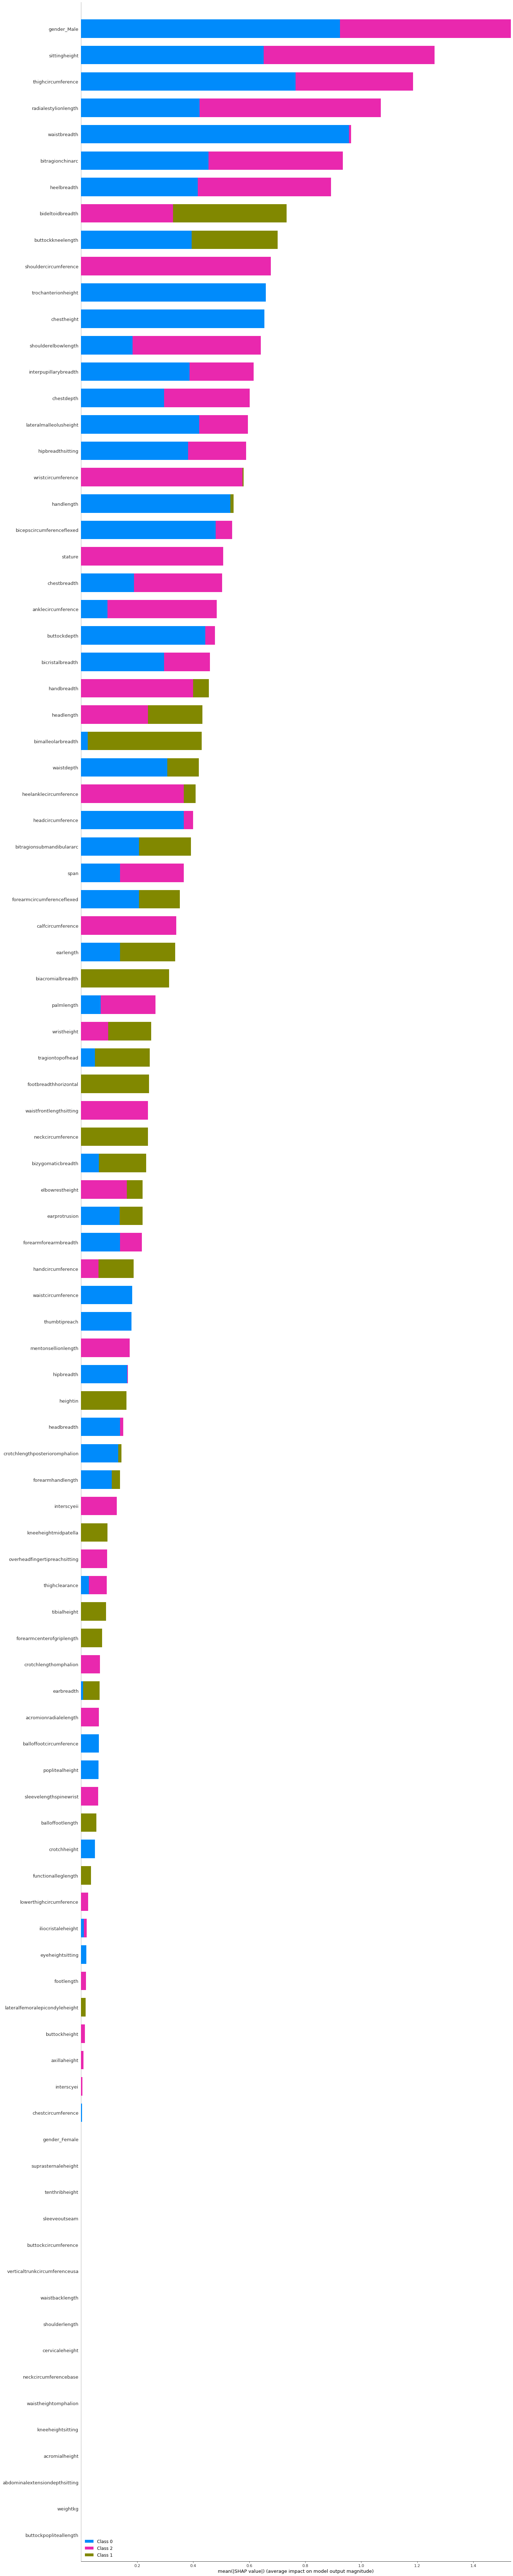

In [92]:
import shap

explainer = shap.Explainer(model_shap, X_train_trans)

shap_values = explainer.shap_values(X_train_trans)

shap.summary_plot(shap_values, max_display=300, feature_names = new_features, plot_size=(20,100))

In [104]:
X.columns

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', 'handbreadth',
      

In [96]:
# I choose features manually

hispanic=["bideltoidbreadth","buttockkneelength", "headlength", "bimalleolarbreadth", "waistdepth",
"bitragionsubmandibulararc", "forearmcircumferenceflexed", "earlength", "biacromialbreadth",
"wristheight", "tragiontopofhead", "footbreadthhorizontal", "neckcircumferencebase", "bizygomaticbreadth",
"earlength", "elbowrestheight", "earprotrusion", "handcircumference","heightin", "kneeheightmidpatella",
"tibialheight", "forearmcenterofgriplength", "earbreadth", "balloffootlength", "functionalleglength"  ]

In [98]:
X2 = X[hispanic]
X2.head()

,bideltoidbreadth,buttockkneelength,headlength,bimalleolarbreadth,waistdepth,bitragionsubmandibulararc,forearmcircumferenceflexed,earlength,biacromialbreadth,wristheight,tragiontopofhead,footbreadthhorizontal,neckcircumferencebase,bizygomaticbreadth,earlength,elbowrestheight,earprotrusion,handcircumference,heightin,kneeheightmidpatella,tibialheight,forearmcenterofgriplength,earbreadth,balloffootlength,functionalleglength
0,493,619,206,71,240,291,299,71,401,853,140,101,436,142,71,247,19,214,71,502,491,349,36,202,1136
1,479,584,201,67,225,320,289,62,394,815,120,98,420,135,62,232,18,203,68,490,476,348,33,193,1096
2,544,623,202,75,255,330,357,61,427,831,125,103,434,135,61,237,23,220,68,496,477,355,40,196,1115
3,518,560,199,73,205,309,318,66,401,793,127,106,446,143,66,272,25,217,66,460,445,352,39,199,1034
4,524,706,197,80,214,310,324,56,435,954,122,111,430,138,56,188,19,222,77,612,584,399,32,224,1279


In [100]:
X2.select_dtypes("object").columns

Index([], dtype='object')

In [101]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.25, random_state=42, stratify =y)

In [102]:
model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=42, penalty="l1", solver='saga')

operations_shap = [("Scaler",MinMaxScaler()),("LogisticModel", model_shap)]

pipe_shap_model = Pipeline(steps=operations_shap)
pipe_shap_model.fit(X_train2, y_train2)

Pipeline(steps=[('Scaler', MinMaxScaler()),
                ('LogisticModel',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=42,
                                    solver='saga'))])

In [103]:
eval_metric(pipe_shap_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[249  40  36]
 [ 27 103  40]
 [115 215 618]]
              precision    recall  f1-score   support

       Black       0.64      0.77      0.70       325
    Hispanic       0.29      0.61      0.39       170
       White       0.89      0.65      0.75       948

    accuracy                           0.67      1443
   macro avg       0.61      0.67      0.61      1443
weighted avg       0.76      0.67      0.70      1443


Train_Set
[[ 792   89   92]
 [  61  340  108]
 [ 326  659 1859]]
              precision    recall  f1-score   support

       Black       0.67      0.81      0.74       973
    Hispanic       0.31      0.67      0.43       509
       White       0.90      0.65      0.76      2844

    accuracy                           0.69      4326
   macro avg       0.63      0.71      0.64      4326
weighted avg       0.78      0.69      0.71      4326



In [106]:
model = Pipeline(steps=operations_shap)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_precision_Hispanic     0.307166
train_precision_Hispanic    0.313719
test_recall_Hispanic        0.654261
train_recall_Hispanic       0.666994
test_f1_Hispanic            0.418004
train_f1_Hispanic           0.426717
dtype: float64

In [ ]:
# Sonuçlar kötü. EDA süreci ve parametreler tekrar kontrol edilmeli. 
# The results are bad.EDA process and parameters should be checked again.